In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [10]:
# Load data
rawdata = pd.read_csv("/home/jovyan/479/479pricinganalytics/Week1/week1exerciserawdata.csv")
rawdata

,Customer,WTP
0,1,9500
1,2,7871
2,3,10407
3,4,12127
4,5,11996
...,...,...
995,996,10423
996,997,9563
997,998,10805
998,999,10958


In [11]:
# Set the parameters from the case
varcostperunit = 6000
fixedcost = 1000000

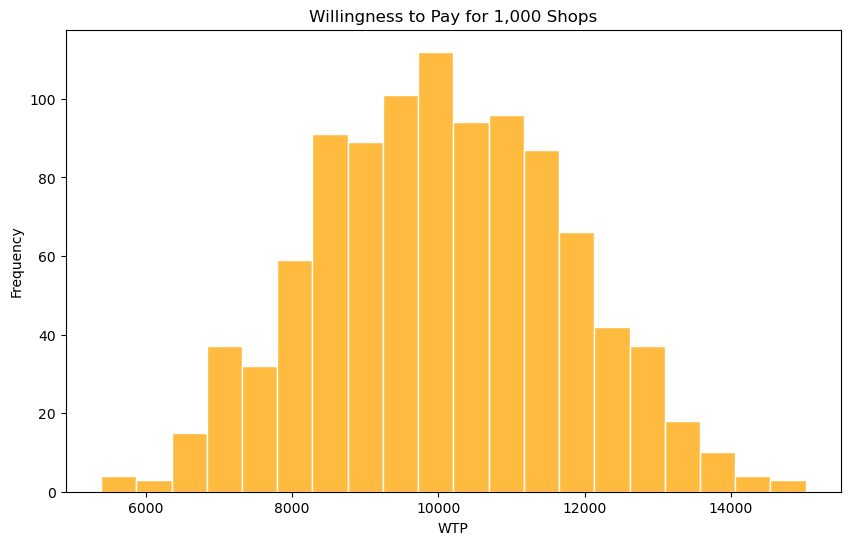

In [12]:
# Replicate the histogram in the case
plt.figure(figsize=(10, 6))
sns.histplot(rawdata['WTP'], bins=20, color='orange', kde=False, edgecolor='white')
plt.title("Willingness to Pay for 1,000 Shops")
plt.xlabel("WTP")
plt.ylabel("Frequency")
plt.show()

Prices to consider are: [ 5000  6000  7000  8000  9000 10000 11000 12000 13000 14000 15000]


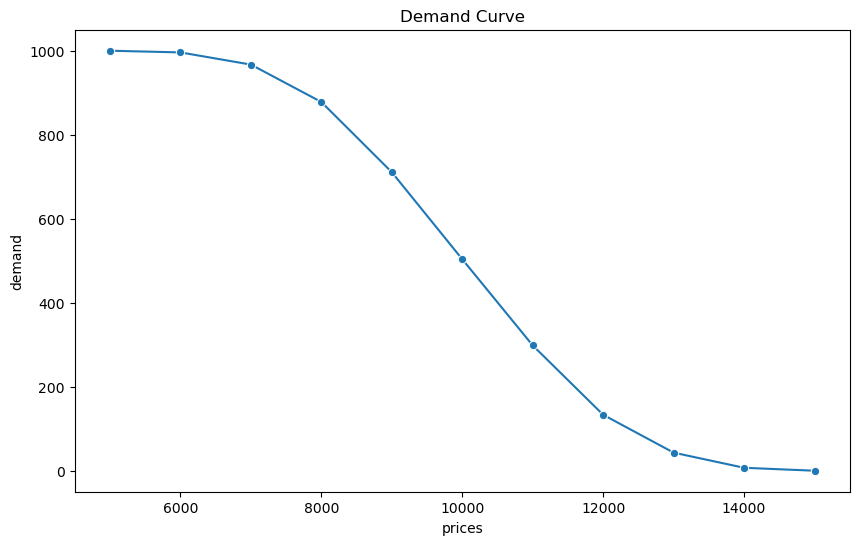

In [13]:
# Set the prices to consider
prices = np.arange(5, 16) * 1000
print("Prices to consider are:", prices)

# Calculate demand for each price
demand = [sum(rawdata['WTP'] >= p) for p in prices]
aggregatedata = pd.DataFrame({'prices': prices, 'demand': demand})

# Plot demand curve
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregatedata, x='prices', y='demand', marker="o")
plt.title("Demand Curve")
plt.show()

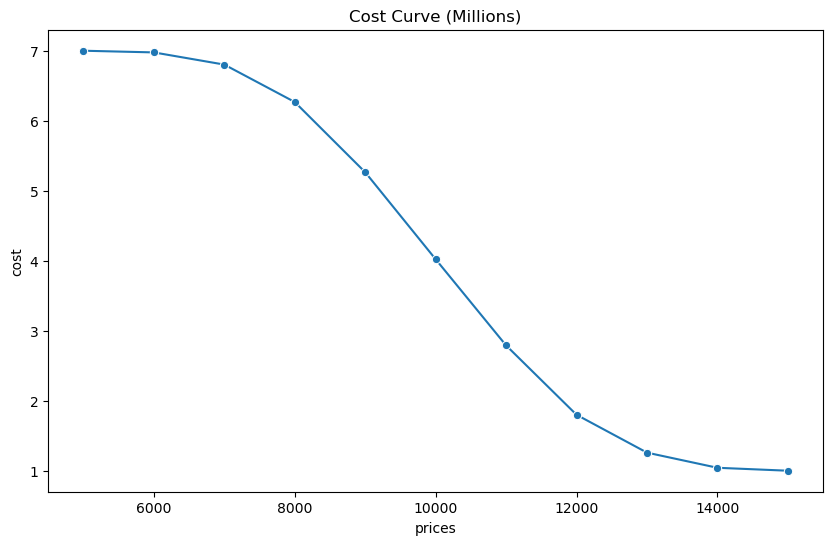

In [14]:
# Find Costs, plot cost curve (in millions of dollars)
aggregatedata['cost'] = (aggregatedata['demand'] * varcostperunit + fixedcost) / 1e6
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregatedata, x='prices', y='cost', marker="o")
plt.title("Cost Curve (Millions)")
plt.show()

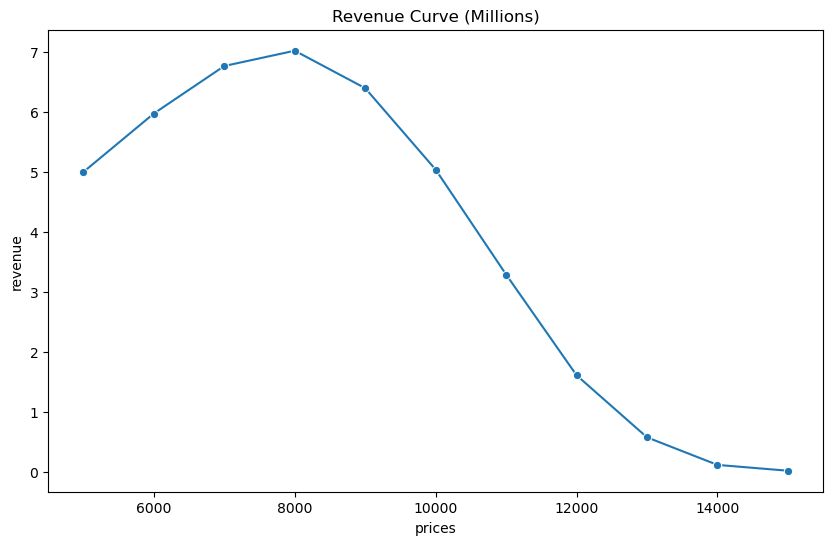

In [15]:
# Find Revenue, plot revenue curve (in millions of dollars)
aggregatedata['revenue'] = (aggregatedata['demand'] * aggregatedata['prices']) / 1e6
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregatedata, x='prices', y='revenue', marker="o")
plt.title("Revenue Curve (Millions)")
plt.show()

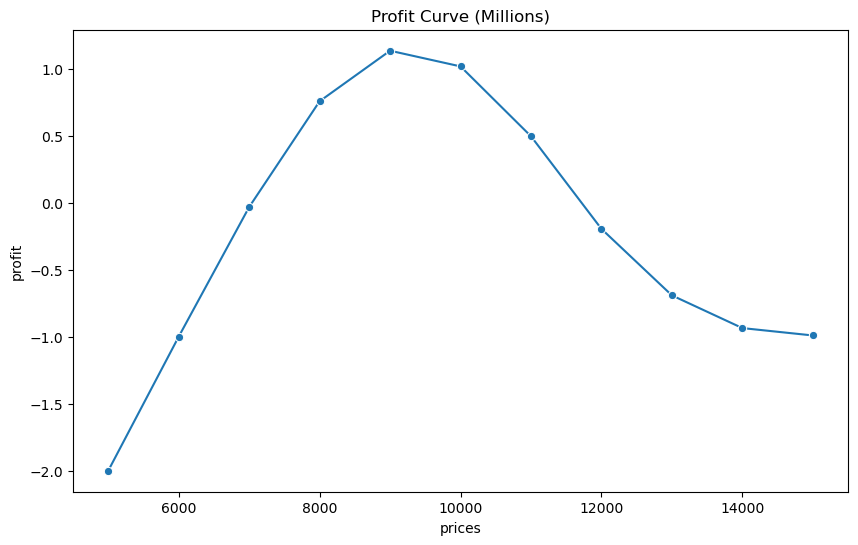

In [16]:
# Find Profits, plot profit curve (in millions of dollars)
aggregatedata['profit'] = aggregatedata['revenue'] - aggregatedata['cost']
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregatedata, x='prices', y='profit', marker="o")
plt.title("Profit Curve (Millions)")
plt.show()

In [17]:
# Profit maximizing prices
profitmaxprice = aggregatedata.loc[aggregatedata['profit'].idxmax()]
print("Data for best price:", profitmaxprice)

Data for best price: prices     9000.000
demand      711.000
cost          5.266
revenue       6.399
profit        1.133
Name: 4, dtype: float64


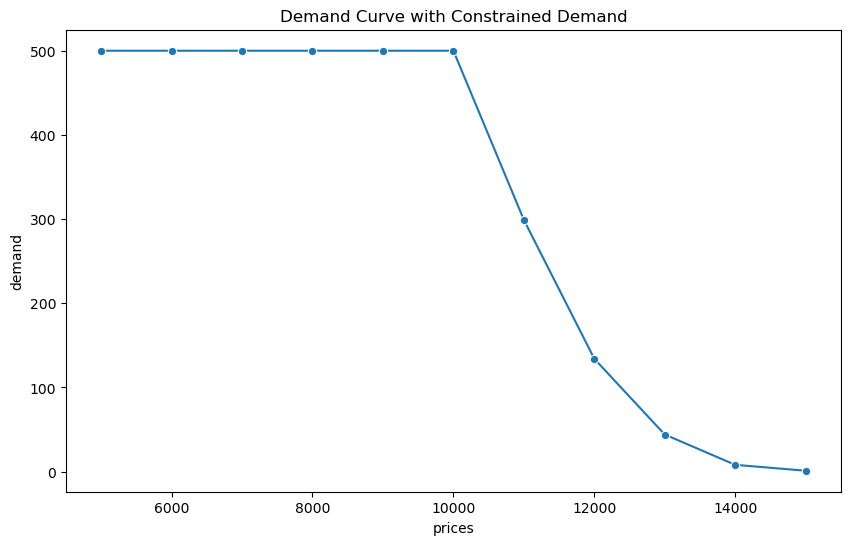

In [18]:
maxdemand = 500
# Ensure demand does not go above maxdemand
datawithconstraint = aggregatedata.copy()
datawithconstraint['demand'] = np.minimum(datawithconstraint['demand'], maxdemand)

# Plot demand curve with constrained demand
plt.figure(figsize=(10, 6))
sns.lineplot(data=datawithconstraint, x='prices', y='demand', marker="o")
plt.title("Demand Curve with Constrained Demand")
plt.show()


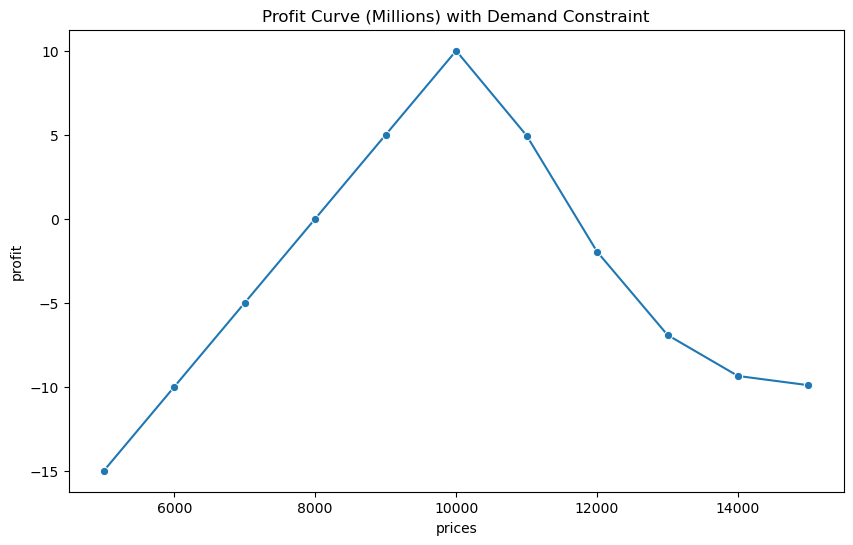

In [19]:
# Find profits with demand constraint (plotting in millions of dollars)
datawithconstraint['cost'] = (datawithconstraint['demand'] * varcostperunit + fixedcost) / 1e5
datawithconstraint['revenue'] = (datawithconstraint['demand'] * datawithconstraint['prices']) / 1e5
datawithconstraint['profit'] = datawithconstraint['revenue'] - datawithconstraint['cost']

plt.figure(figsize=(10, 6))
sns.lineplot(data=datawithconstraint, x='prices', y='profit', marker="o")
plt.title("Profit Curve (Millions) with Demand Constraint")
plt.show()

In [20]:
# Profit maximizing prices with demand constraint
bestprice_data = datawithconstraint.loc[datawithconstraint['profit'].idxmax()]
print("Data for best price with demand constraint:", bestprice_data)

Data for best price with demand constraint: prices     10000.0
demand       500.0
cost          40.0
revenue       50.0
profit        10.0
Name: 5, dtype: float64
